# Rating consistency is consistently underrated: An exploratory analysis of movie-tag rating inconsistency

In this notebook, we generate charts for the corresponding paper and transforming data for its consequent regression analysis in R.

1. Loading data
2. Generating charts for general characteristics
    1. How long ago did you watch [movie]?
    2. To what degree do you agree with the statement "it was easy for me to rate the tag [tag] for the movie [movie]"?
    4. On a scale from 1 to 5, how often do you watch movies that could be described as [tag]?
    3. On a scale from 1 to 5, how familiar are you with the term [tag]?
    4. On a scale from 1 to 5, how strongly does the tag [tag] apply to [movie]?
    5. Rating per pair
3. Generating charts for analysis
    1. Preparing data
        1. Cleaning the ratings
        2. Merging data
        3. Transforming data
        4. Calculating the consistency field
        5. Cleaning data
        6. Converting data types
    2. Generating charts
        1. Correlation matrix
        2. Proportions of consistent ratings per rating value and tag category
        3. Distribution of ease of rating scores for each rating value (1-5) for each of the four tag categories
        4. Distribution of ratings based on rating value and tag category
4. Saving data for regression analysis in R

In [489]:
# imports

import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [490]:
user_movie_tag = pd.read_csv("dataset/annotator_movie_tag.csv")
user_movie_tag.head()

,UID,movie,tag,rating,easy
0,3,Titanic (1997),romance,5,Strongly agree
1,3,Monty Python and the Holy Grail (1975),religion,4,Agree
2,3,Fight Club (1999),disturbing,4,Neither agree nor disagree
3,3,Toy Story (1995),witty,5,Agree
4,3,Blade Runner (1982),space,3,Neither agree nor disagree


In [491]:
user_movie = pd.read_csv("dataset/annotator_movie.csv")
user_movie.head()

,UID,movie,how_long_ago
0,3,Titanic (1997),6to10
1,3,Monty Python and the Holy Grail (1975),1to5
2,3,Fight Club (1999),1
3,3,Toy Story (1995),6to10
4,3,Blade Runner (1982),1to5


In [492]:
user_tag = pd.read_csv("dataset/annotator_tag.csv")
user_tag.head()

,UID,tag,familiar,how_often,first,second,third
0,3,romance,5,5,love,relationship,happiness
1,3,religion,5,5,worship,god,pilgrim
2,3,disturbing,5,5,fights,gore,blood
3,3,witty,3,3,clever,smart,funny
4,3,space,5,5,stars,galaxy,nebula


In [493]:
categories = pd.read_csv("dataset/categories.csv")
categories.head()

,tag,label
0,action,3
1,adventure,3
2,aliens,0
3,animation,0
4,art house,3


### How long ago did you watch [movie]?

In [494]:
how_long = user_movie.how_long_ago.value_counts().reset_index()
how_long.head()

,index,how_long_ago
0,1to5,1146
1,gt10,1120
2,6to10,1052
3,1,613
4,-1,91


In [495]:
how_long.loc[how_long["index"] == "1", "index"] = "[0; 1)"
how_long.loc[how_long["index"] == "1to5", "index"] = "[1; 5]"
how_long.loc[how_long["index"] == "6to10", "index"] = "[6; 10]"
how_long.loc[how_long["index"] == "gt10", "index"] = "> 10"
how_long.loc[how_long["index"] == "-1", "index"] = "NA"
how_long.head()

,index,how_long_ago
0,[1; 5],1146
1,> 10,1120
2,[6; 10],1052
3,[0; 1),613
4,NA,91


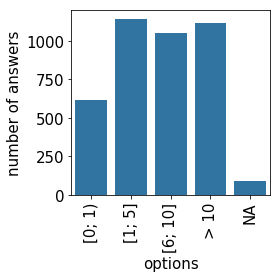

In [496]:
def draw_and_save_chart(ax, xlabel, ylabel, file_path, rotation=0):
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.tick_params(labelsize=15)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.savefig(file_path)

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=how_long, x="index", y="how_long_ago", color='#1E77B4', ax=ax, order=["[0; 1)", "[1; 5]", "[6; 10]", "> 10", "NA"])
draw_and_save_chart(ax, 'options', 'number of answers', 'charts/how_long_ago.pdf', rotation=90)

### To what degree do you agree with the statement "it was easy for me to rate the tag [tag] for the movie [movie]"?

In [497]:
easy = user_movie_tag.easy.value_counts().reset_index()
easy

,index,easy
0,Agree,1564
1,Strongly agree,1146
2,Neither agree nor disagree,626
3,Disagree,327
4,Strongly disagree,161


In [498]:
easy.loc[easy["index"] == "Strongly agree", "index"] = "5"
easy.loc[easy["index"] == "Agree", "index"] = "4"
easy.loc[easy["index"] == "Neither agree nor disagree", "index"] = "3"
easy.loc[easy["index"] == "Disagree", "index"] = "2"
easy.loc[easy["index"] == "Strongly disagree", "index"] = "1"
easy.head()

,index,easy
0,4,1564
1,5,1146
2,3,626
3,2,327
4,1,161


In [499]:
easy["index"] = easy["index"].astype(int)
easy = easy.sort_values("index", ascending=False)
easy

,index,easy
1,5,1146
0,4,1564
2,3,626
3,2,327
4,1,161


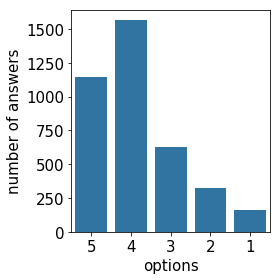

In [500]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=easy, x="index", y="easy", color='#1E77B4', ax=ax, order=easy["index"])
draw_and_save_chart(ax, 'options', 'number of answers', 'charts/easy.pdf', rotation=0)

### On a scale from 1 to 5, how often do you watch movies that could be described as [tag]?

In [501]:
often = user_tag.how_often.value_counts().reset_index()
often

,index,how_often
0,5,1264
1,4,935
2,3,736
3,2,647
4,1,181
5,-1,61


In [502]:
often = often.sort_values("index", ascending=False)
often.loc[often["index"] == -1, "index"] = "NA"

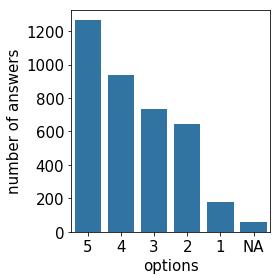

In [503]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=often, x="index", y="how_often", color='#1E77B4', ax=ax)
draw_and_save_chart(ax, 'options', 'number of answers', 'charts/how_often.pdf', rotation=0)

### On a scale from 1 to 5, how familiar are you with the term [tag]?

In [504]:
familiar = user_tag.familiar.value_counts().reset_index()
familiar

,index,familiar
0,5,2332
1,4,808
2,3,378
3,2,163
4,1,104
5,-1,39


In [505]:
familiar = familiar.sort_values("index", ascending=False)
familiar.loc[familiar["index"] == -1, "index"] = "NA"

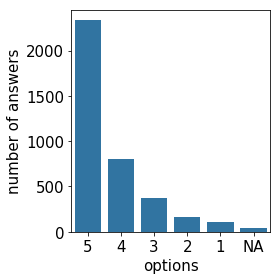

In [506]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=familiar, x="index", y="familiar", color='#1E77B4', ax=ax)
draw_and_save_chart(ax, 'options', 'number of answers', 'charts/familiar.pdf', rotation=0)

### On a scale from 1 to 5, how strongly does the tag [tag] apply to [movie]?

In [507]:
rating = user_movie_tag.rating.value_counts().reset_index()
rating

,index,rating
0,5,1531
1,4,821
2,3,576
3,1,520
4,2,454
5,-1,120


In [508]:
rating = rating.sort_values("index", ascending=False)
rating.loc[rating["index"] == -1, "index"] = "NA"
rating.head(20)

,index,rating
0,5,1531
1,4,821
2,3,576
4,2,454
3,1,520
5,NA,120


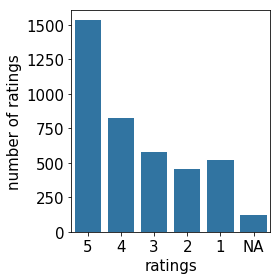

In [509]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=rating, x="index", y="rating", color='#1E77B4', ax=ax)
draw_and_save_chart(ax, 'ratings', 'number of ratings', 'charts/rating.pdf', rotation=0)

### Rating per pair

In [510]:
movie_tag = user_movie_tag.groupby(["movie", "tag"]).UID.count().reset_index()
movie_tag.head()

,movie,tag,UID
0,Ace Ventura: Pet Detective (1994),comedy,13
1,Ace Ventura: Pet Detective (1994),culture clash,9
2,Ace Ventura: Pet Detective (1994),drama,6
3,Ace Ventura: Pet Detective (1994),humorous,9
4,Ace Ventura: When Nature Calls (1995),stupid,15


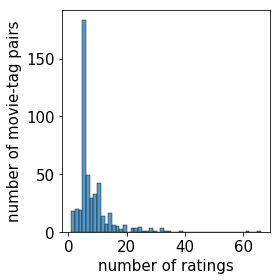

In [511]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.histplot(data=movie_tag, x="UID", color='#1E77B4', ax=ax)
draw_and_save_chart(ax, 'number of ratings', 'number of movie-tag pairs', 'charts/ratings_per_pair.pdf')

## Generating charts for analysis
### Preparing data
#### Cleaning the ratings

In [512]:
user_movie_tag = user_movie_tag[user_movie_tag.rating != -1]
user_movie_tag.head()

,UID,movie,tag,rating,easy
0,3,Titanic (1997),romance,5,Strongly agree
1,3,Monty Python and the Holy Grail (1975),religion,4,Agree
2,3,Fight Club (1999),disturbing,4,Neither agree nor disagree
3,3,Toy Story (1995),witty,5,Agree
4,3,Blade Runner (1982),space,3,Neither agree nor disagree


#### Merging data

In [513]:
user_movie_tag = pd.merge(user_movie_tag, user_movie, on=["UID", "movie"], how="inner")
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago
0,3,Titanic (1997),romance,5,Strongly agree,6to10
1,3,Monty Python and the Holy Grail (1975),religion,4,Agree,1to5
2,3,Fight Club (1999),disturbing,4,Neither agree nor disagree,1
3,3,Toy Story (1995),witty,5,Agree,6to10
4,3,Blade Runner (1982),space,3,Neither agree nor disagree,1to5


In [514]:
user_movie_tag = pd.merge(user_movie_tag, user_tag, on=["UID", "tag"], how="inner")
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago,familiar,how_often,first,second,third
0,3,Titanic (1997),romance,5,Strongly agree,6to10,5,5,love,relationship,happiness
1,3,Monty Python and the Holy Grail (1975),religion,4,Agree,1to5,5,5,worship,god,pilgrim
2,3,Fight Club (1999),disturbing,4,Neither agree nor disagree,1,5,5,fights,gore,blood
3,3,Toy Story (1995),witty,5,Agree,6to10,3,3,clever,smart,funny
4,3,Blade Runner (1982),space,3,Neither agree nor disagree,1to5,5,5,stars,galaxy,nebula


In [515]:
user_movie_tag = pd.merge(user_movie_tag, categories, on="tag", how="inner")
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago,familiar,how_often,first,second,third,label
0,3,Titanic (1997),romance,5,Strongly agree,6to10,5,5,love,relationship,happiness,3
1,31,Titanic (1997),romance,2,Neither agree nor disagree,gt10,5,4,love,couple,family,3
2,53,Titanic (1997),romance,5,NaN,6to10,5,4,love,good endings,family movie,3
3,53,Pretty Woman (1990),romance,5,Strongly agree,6to10,5,4,love,good endings,family movie,3
4,64,Titanic (1997),romance,5,Strongly agree,gt10,5,4,Love bird,Blind,Puppy Love,3


#### Transforming data

In [516]:
user_movie_tag["easy"] = user_movie_tag.easy.replace({"Strongly agree": 5, "Agree": 4,
                                  "Disagree": 2, "Strongly disagree": 1,
                                  "Neither agree nor disagree": 3})
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago,familiar,how_often,first,second,third,label
0,3,Titanic (1997),romance,5,5.0,6to10,5,5,love,relationship,happiness,3
1,31,Titanic (1997),romance,2,3.0,gt10,5,4,love,couple,family,3
2,53,Titanic (1997),romance,5,NaN,6to10,5,4,love,good endings,family movie,3
3,53,Pretty Woman (1990),romance,5,5.0,6to10,5,4,love,good endings,family movie,3
4,64,Titanic (1997),romance,5,5.0,gt10,5,4,Love bird,Blind,Puppy Love,3


In [517]:
user_movie_tag["how_long_ago"] = user_movie_tag.how_long_ago.replace({"1to5":2,
                                                                                    "gt10":4,
                                                                                    "6to10":3,
                                                                                    "1":1,
                                                                                    "-1":math.nan})
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago,familiar,how_often,first,second,third,label
0,3,Titanic (1997),romance,5,5.0,3.0,5,5,love,relationship,happiness,3
1,31,Titanic (1997),romance,2,3.0,4.0,5,4,love,couple,family,3
2,53,Titanic (1997),romance,5,NaN,3.0,5,4,love,good endings,family movie,3
3,53,Pretty Woman (1990),romance,5,5.0,3.0,5,4,love,good endings,family movie,3
4,64,Titanic (1997),romance,5,5.0,4.0,5,4,Love bird,Blind,Puppy Love,3


In [518]:
user_movie_tag["obj"] = (user_movie_tag["label"] == 0).astype(int)
user_movie_tag["subj"] = (user_movie_tag["label"] == 1).astype(int)
user_movie_tag["misc"] = (user_movie_tag["label"] == 2).astype(int)
user_movie_tag["genre"] = (user_movie_tag["label"] == 3).astype(int)
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago,familiar,how_often,first,second,third,label,obj,subj,misc,genre
0,3,Titanic (1997),romance,5,5.0,3.0,5,5,love,relationship,happiness,3,0,0,0,1
1,31,Titanic (1997),romance,2,3.0,4.0,5,4,love,couple,family,3,0,0,0,1
2,53,Titanic (1997),romance,5,NaN,3.0,5,4,love,good endings,family movie,3,0,0,0,1
3,53,Pretty Woman (1990),romance,5,5.0,3.0,5,4,love,good endings,family movie,3,0,0,0,1
4,64,Titanic (1997),romance,5,5.0,4.0,5,4,Love bird,Blind,Puppy Love,3,0,0,0,1


#### Calculating the consistency field

In [519]:
user_movie_tag_mode =  user_movie_tag.groupby(["movie", "tag"]).rating.agg(lambda x:x.value_counts().index[0]).reset_index()
user_movie_tag_mode = user_movie_tag_mode.rename(columns={"rating":"mode"})
user_movie_tag_mode.head()

,movie,tag,mode
0,Ace Ventura: Pet Detective (1994),comedy,5
1,Ace Ventura: Pet Detective (1994),culture clash,3
2,Ace Ventura: Pet Detective (1994),drama,1
3,Ace Ventura: Pet Detective (1994),humorous,5
4,Ace Ventura: When Nature Calls (1995),stupid,5


In [520]:
user_movie_tag = pd.merge( user_movie_tag, user_movie_tag_mode, on=["movie", "tag"])
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago,familiar,how_often,first,second,third,label,obj,subj,misc,genre,mode
0,3,Titanic (1997),romance,5,5.0,3.0,5,5,love,relationship,happiness,3,0,0,0,1,5
1,31,Titanic (1997),romance,2,3.0,4.0,5,4,love,couple,family,3,0,0,0,1,5
2,53,Titanic (1997),romance,5,NaN,3.0,5,4,love,good endings,family movie,3,0,0,0,1,5
3,64,Titanic (1997),romance,5,5.0,4.0,5,4,Love bird,Blind,Puppy Love,3,0,0,0,1,5
4,76,Titanic (1997),romance,4,4.0,4.0,5,5,feeling love,arouse position,mood of sex,3,0,0,0,1,5


In [521]:
user_movie_tag["consistency"] = (user_movie_tag.rating == user_movie_tag["mode"]).astype(int)
user_movie_tag.head()

,UID,movie,tag,rating,easy,how_long_ago,familiar,how_often,first,second,third,label,obj,subj,misc,genre,mode,consistency
0,3,Titanic (1997),romance,5,5.0,3.0,5,5,love,relationship,happiness,3,0,0,0,1,5,1
1,31,Titanic (1997),romance,2,3.0,4.0,5,4,love,couple,family,3,0,0,0,1,5,0
2,53,Titanic (1997),romance,5,NaN,3.0,5,4,love,good endings,family movie,3,0,0,0,1,5,1
3,64,Titanic (1997),romance,5,5.0,4.0,5,4,Love bird,Blind,Puppy Love,3,0,0,0,1,5,1
4,76,Titanic (1997),romance,4,4.0,4.0,5,5,feeling love,arouse position,mood of sex,3,0,0,0,1,5,0


#### Cleaning data

In [522]:
user_movie_tag = user_movie_tag[['UID', 'movie', 'tag', 'rating',
       'familiar', 'how_often',
       'easy', 'how_long_ago', 'consistency', 'obj', 'subj',
       'misc', 'genre', 'label']].replace({-1:None})
user_movie_tag.head()

,UID,movie,tag,rating,familiar,how_often,easy,how_long_ago,consistency,obj,subj,misc,genre,label
0,3,Titanic (1997),romance,5,5,5,5.0,3.0,1,0,0,0,1,3
1,31,Titanic (1997),romance,2,5,4,3.0,4.0,0,0,0,0,1,3
2,53,Titanic (1997),romance,5,5,4,NaN,3.0,1,0,0,0,1,3
3,64,Titanic (1997),romance,5,5,4,5.0,4.0,1,0,0,0,1,3
4,76,Titanic (1997),romance,4,5,5,4.0,4.0,0,0,0,0,1,3


#### Converting data types

In [523]:
for field in ["label", "familiar", "how_often", "easy", "how_long_ago"]:
    user_movie_tag[field] = user_movie_tag[field].astype("float64")
user_movie_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 0 to 3901
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UID           3902 non-null   object 
 1   movie         3902 non-null   object 
 2   tag           3902 non-null   object 
 3   rating        3902 non-null   object 
 4   familiar      3873 non-null   float64
 5   how_often     3858 non-null   float64
 6   easy          3708 non-null   float64
 7   how_long_ago  3827 non-null   float64
 8   consistency   3902 non-null   object 
 9   obj           3902 non-null   object 
 10  subj          3902 non-null   object 
 11  misc          3902 non-null   object 
 12  genre         3902 non-null   object 
 13  label         3902 non-null   float64
dtypes: float64(5), object(9)
memory usage: 457.3+ KB


In [524]:
user_movie_tag.rating = user_movie_tag.rating.astype(int)
user_movie_tag.consistency = user_movie_tag.consistency.astype(int)
user_movie_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 0 to 3901
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UID           3902 non-null   object 
 1   movie         3902 non-null   object 
 2   tag           3902 non-null   object 
 3   rating        3902 non-null   int64  
 4   familiar      3873 non-null   float64
 5   how_often     3858 non-null   float64
 6   easy          3708 non-null   float64
 7   how_long_ago  3827 non-null   float64
 8   consistency   3902 non-null   int64  
 9   obj           3902 non-null   object 
 10  subj          3902 non-null   object 
 11  misc          3902 non-null   object 
 12  genre         3902 non-null   object 
 13  label         3902 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 457.3+ KB


In [525]:
user_movie_tag["category"] = user_movie_tag.label
user_movie_tag["category"] = user_movie_tag["category"].replace(to_replace=0, value="objective")
user_movie_tag["category"] = user_movie_tag["category"].replace(to_replace=1, value="misc")
user_movie_tag["category"] = user_movie_tag["category"].replace(to_replace=2, value="subjective")
user_movie_tag["category"] = user_movie_tag["category"].replace(to_replace=3, value="genre")
user_movie_tag.head()

,UID,movie,tag,rating,familiar,how_often,easy,how_long_ago,consistency,obj,subj,misc,genre,label,category
0,3,Titanic (1997),romance,5,5.0,5.0,5.0,3.0,1,0,0,0,1,3.0,genre
1,31,Titanic (1997),romance,2,5.0,4.0,3.0,4.0,0,0,0,0,1,3.0,genre
2,53,Titanic (1997),romance,5,5.0,4.0,NaN,3.0,1,0,0,0,1,3.0,genre
3,64,Titanic (1997),romance,5,5.0,4.0,5.0,4.0,1,0,0,0,1,3.0,genre
4,76,Titanic (1997),romance,4,5.0,5.0,4.0,4.0,0,0,0,0,1,3.0,genre


### Generating charts
#### Correlation matrix

In [526]:
corr_map = user_movie_tag[["familiar", "how_often", "easy",
                           "how_long_ago", "rating",
                           "consistency"]].corr(method="spearman")
corr_map

,familiar,how_often,easy,how_long_ago,rating,consistency
familiar,1.000000,0.400384,0.217067,0.021903,0.131944,0.139118
how_often,0.400384,1.000000,0.090379,-0.066656,0.249644,0.089540
easy,0.217067,0.090379,1.000000,-0.051846,0.432563,0.289462
how_long_ago,0.021903,-0.066656,-0.051846,1.000000,-0.018961,-0.012199
rating,0.131944,0.249644,0.432563,-0.018961,1.000000,0.367936
consistency,0.139118,0.089540,0.289462,-0.012199,0.367936,1.000000


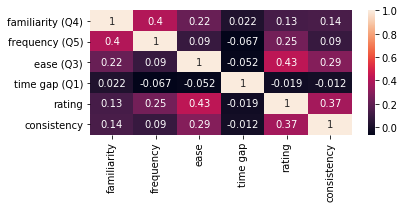

In [527]:
plt.figure(figsize=(6, 3))
x_axis_labels = ["familiarity (Q4)","frequency (Q5)","ease (Q3)",
                 "time gap (Q1)", "rating", "consistency"]
y_axis_labels = ["familiarity","frequency","ease",
                 "time gap", "rating", "consistency"]
heatmap = sns.heatmap(corr_map, annot=True,
                      xticklabels=y_axis_labels, yticklabels=x_axis_labels)
plt.tight_layout()
heatmap.figure.savefig("charts/corr_map_spearman.pdf")

#### Proportions of consistent ratings per rating value and tag category

In [528]:
user_movie_tag_cat_rating = user_movie_tag.groupby(["category", "rating"]).agg({"consistency":"sum", "UID":"count"}).reset_index()
user_movie_tag_cat_rating.head()
user_movie_tag_cat_rating["relative_consistency"] = user_movie_tag_cat_rating.consistency / user_movie_tag_cat_rating.UID - 0.5
user_movie_tag_cat_rating = user_movie_tag_cat_rating.sort_values("category")
user_movie_tag_cat_rating.head()

,category,rating,consistency,UID,relative_consistency
0,genre,1,75,127,0.090551
1,genre,2,27,103,-0.237864
2,genre,3,10,122,-0.418033
3,genre,4,57,182,-0.186813
4,genre,5,363,410,0.385366


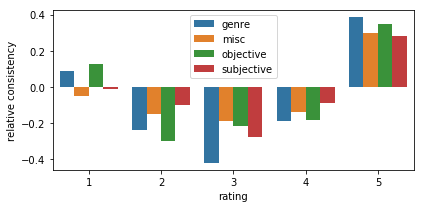

In [529]:
ax = plt.subplots(figsize=(6, 3))[1]
sns.barplot(data=user_movie_tag_cat_rating, x="rating", y="relative_consistency", hue="category", ax=ax)
ax.set_ylabel("relative consistency")
ax.legend(loc='upper center')
plt.tight_layout()
ax.figure.savefig("charts/rating_categories_consistency.pdf")


#### Distribution of ease of rating scores for each rating value (1-5) for each of the four tag categories

In [530]:
easiness_rating = user_movie_tag.groupby(["category", "rating", "easy"]).UID.count().reset_index()
easiness_rating = easiness_rating.rename(columns={"easy":"easiness", "UID":"easiness_count"})
easiness_rating.head()

,category,rating,easiness,easiness_count
0,genre,1,1.0,27
1,genre,1,2.0,3
2,genre,1,3.0,2
3,genre,1,4.0,34
4,genre,1,5.0,55


In [531]:
rating_group = user_movie_tag.groupby(["category", "rating"]).UID.count().reset_index()
rating_group = rating_group.rename(columns={"UID":"rating_count"})
rating_group.head()

,category,rating,rating_count
0,genre,1,127
1,genre,2,103
2,genre,3,122
3,genre,4,182
4,genre,5,410


In [532]:
easiness_rating = pd.merge(easiness_rating, rating_group, on=["category", "rating"], how="left")
easiness_rating.head()

,category,rating,easiness,easiness_count,rating_count
0,genre,1,1.0,27,127
1,genre,1,2.0,3,127
2,genre,1,3.0,2,127
3,genre,1,4.0,34,127
4,genre,1,5.0,55,127


In [533]:
easiness_rating["relative_count"] = easiness_rating.easiness_count / easiness_rating.rating_count
easiness_rating.head()

,category,rating,easiness,easiness_count,rating_count,relative_count
0,genre,1,1.0,27,127,0.212598
1,genre,1,2.0,3,127,0.023622
2,genre,1,3.0,2,127,0.015748
3,genre,1,4.0,34,127,0.267717
4,genre,1,5.0,55,127,0.433071


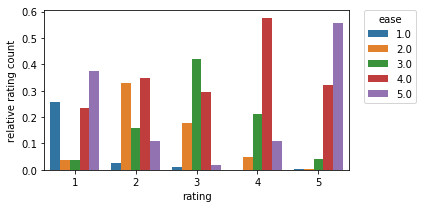

In [534]:
def draw_ratings_per_easiness(easiness_rating, category):
    ax = plt.subplots(figsize=(6, 3))[1]
    sns.barplot(data=easiness_rating[easiness_rating.category == category], x="rating", y="relative_count", hue="easiness", ax=ax)
    ax.set_ylabel("relative rating count")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="ease")
    plt.tight_layout()
    ax.figure.savefig(f"charts/ratings_per_easiness_{category}.pdf")
draw_ratings_per_easiness(easiness_rating, "objective")

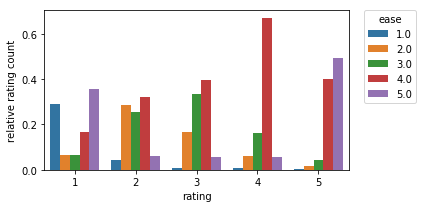

In [535]:
draw_ratings_per_easiness(easiness_rating, "subjective")

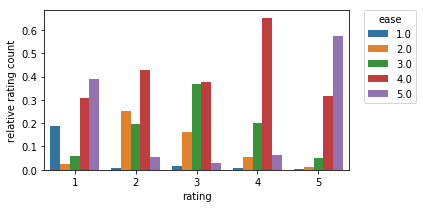

In [536]:
draw_ratings_per_easiness(easiness_rating, "misc")

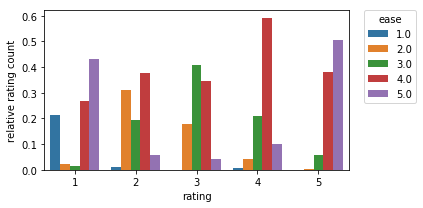

In [537]:
draw_ratings_per_easiness(easiness_rating, "genre")


### Distribution of ratings based on rating value and tag category

In [538]:
rating_category_all = user_movie_tag.groupby(["category"]).UID.count().reset_index()
rating_category_all = rating_category_all.rename(columns={"UID":"category_count"})
rating_category_all.head()

,category,category_count
0,genre,944
1,misc,755
2,objective,1228
3,subjective,975


In [539]:
rating_category = user_movie_tag.groupby(["category", "rating"]).UID.count().reset_index()
rating_category = rating_category.rename(columns={"UID":"rating_category_count"})
rating_category.head()

,category,rating,rating_category_count
0,genre,1,127
1,genre,2,103
2,genre,3,122
3,genre,4,182
4,genre,5,410


In [540]:
print(len(rating_category))
rating_category = pd.merge(rating_category_all, rating_category, on="category", how="right")
print(len(rating_category))
print(rating_category.head())

20
20
  category  category_count  rating  rating_category_count
0    genre             944       1                    127
1    genre             944       2                    103
2    genre             944       3                    122
3    genre             944       4                    182
4    genre             944       5                    410


In [541]:
rating_category["relative_count"] = rating_category.rating_category_count / rating_category.category_count
rating_category = rating_category.sort_values("category")
rating_category.head()

,category,category_count,rating,rating_category_count,relative_count
0,genre,944,1,127,0.134534
1,genre,944,2,103,0.109110
2,genre,944,3,122,0.129237
3,genre,944,4,182,0.192797
4,genre,944,5,410,0.434322


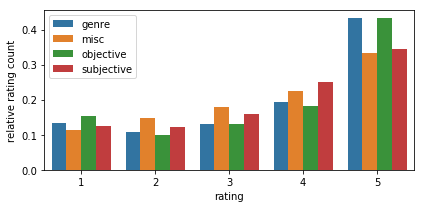

In [542]:
ax = plt.subplots(figsize=(6, 3))[1]
sns.barplot(data=rating_category, x="rating", y="relative_count", hue="category", ax=ax)
ax.set_ylabel("relative rating count")
ax.legend(loc='upper left')
plt.tight_layout()
ax.figure.savefig("charts/rating_category_frac.pdf")

## Saving data for regression analysis in R

In [543]:
user_movie_tag.to_csv("transformed.csv")